In [53]:
import os, sys
#pathname = os.path.dirname(sys.argv[0])
#full_pathname = os.path.abspath(pathname)
#split_pathname = full_pathname.split(sep="mvesc")
#base_pathname = os.path.join(split_pathname[0], "mvesc")
#parentdir = os.path.join(base_pathname, "ETL")
#sys.path.insert(0,parentdir)
parentdir = os.path.abspath('/home/xcheng/mvesc/ETL')
sys.path.insert(0,parentdir)
from mvesc_utility_functions import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import Image

%load_ext autotime
%matplotlib inline

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 6.41 ms


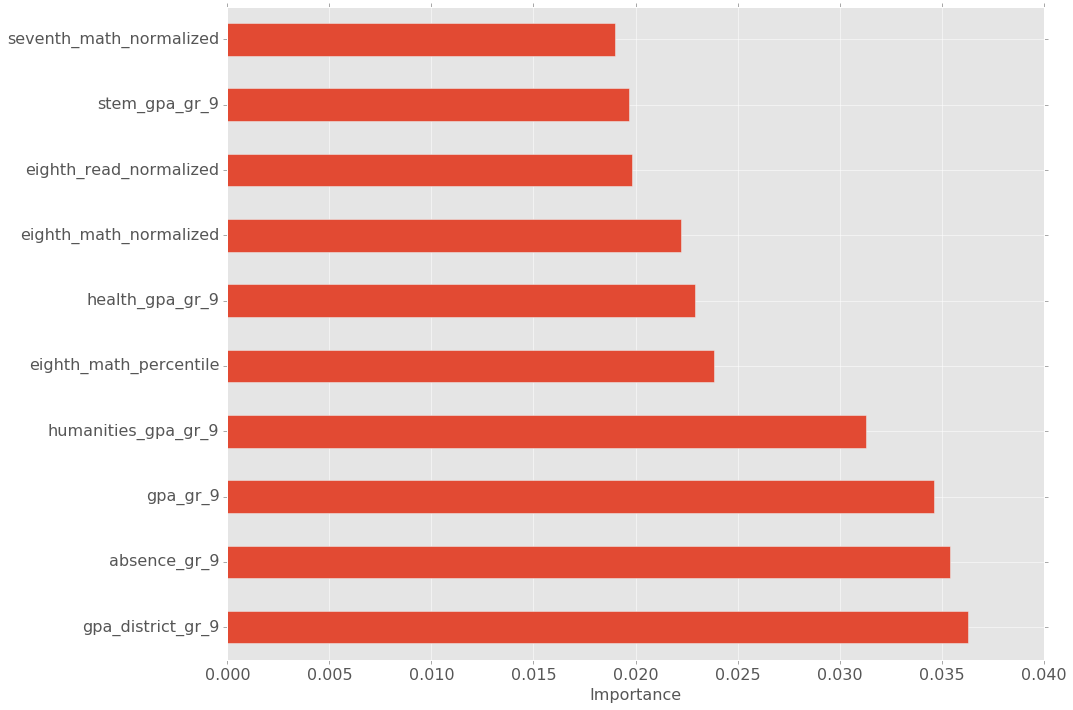

time: 2.38 s


In [81]:
#08_09_2016_grade_6_param_set_0_RF_ht_8585
#08_09_2016_grade_7_param_set_7_RF_ht_10497
#08_09_2016_grade_8_param_set_13_RF_ht_13254
#08_09_2016_grade_9_param_set_0_RF_ht_8645
#08_09_2016_grade_10_param_set_0_RF_ht_8680
table = '08_09_2016_grade_10_param_set_0_RF_ht_8680'
topN = 10 
title = ''
xlabel = 'Importance'
ylabel = ''
fontsize=16
figsize = (15, 10)
plt.style.use('ggplot')

with postgres_pgconnection_generator() as conn:
    with conn.cursor() as cursor:
        feature_importances = read_table_to_df(conn, table, schema='feature_scores', nrows=-1)
    
df = feature_importances[['importance']]
df.index = feature_importances['feature']
ax = df.iloc[:topN,:].plot(kind='barh', title=title, figsize=figsize, fontsize=fontsize, legend=False)
plt.ylabel(ylabel, fontsize=fontsize)
plt.xlabel(xlabel, fontsize=fontsize)
plt.tight_layout()
plt.savefig('./figs/feature_importance_'+table+'.png', dpi=400)

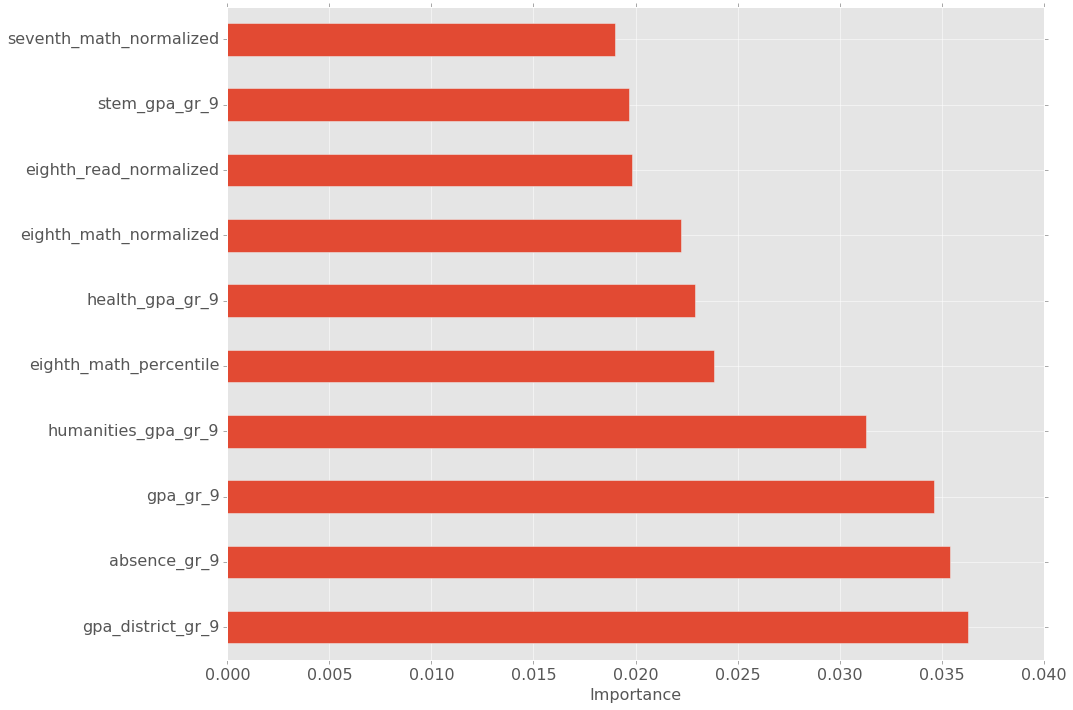

time: 476 ms


In [91]:
df = feature_importances[['importance']]
df.index = feature_importances['feature']
df = df.sort_values(by=['importance'], ascending=False)
ax = df.iloc[:topN,:].plot(kind='barh', title=title, figsize=figsize, fontsize=fontsize, legend=False)
plt.ylabel(ylabel, fontsize=fontsize)
plt.xlabel(xlabel, fontsize=fontsize)
plt.tight_layout()
#plt.savefig('./figs/feature_importance_'+table+'.png', dpi=400)
#Image(filename='./figs/feature_importance_'+table+'.png')

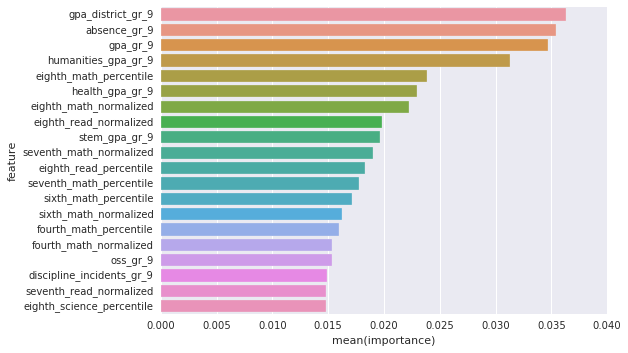

time: 532 ms


In [94]:
import seaborn as sns
sns.barplot(y=df.index, x=df['importance'])

In [93]:
df

,importance
feature,
gpa_district_gr_9,0.036289
absence_gr_9,0.035405
gpa_gr_9,0.034651
humanities_gpa_gr_9,0.031303
eighth_math_percentile,0.023849
health_gpa_gr_9,0.022924
eighth_math_normalized,0.022209
eighth_read_normalized,0.019845
stem_gpa_gr_9,0.019664


time: 11.6 ms


In [112]:
def plot_feature_importance(table, schema='feature_scores', topN=10, title='', save=True,
                            xlabel='', ylabel='', fontsize=16, figsize=(15, 10), savedir='./figs/'):
    plt.style.use('ggplot')
    with postgres_pgconnection_generator() as conn:
        feature_importances = read_table_to_df(conn, table, schema='feature_scores')

    df = feature_importances[['importance']]
    df.index = feature_importances['feature']
    ax = df.iloc[:topN:-1,:].plot(kind='barh', title=title, figsize=figsize, fontsize=fontsize, legend=False)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.xlabel(xlabel, fontsize=fontsize)
    plt.tight_layout()
    if save==True:
        plt.savefig(savedir+'feature_importance_'+table+'.png', dpi=400)

time: 10.6 ms


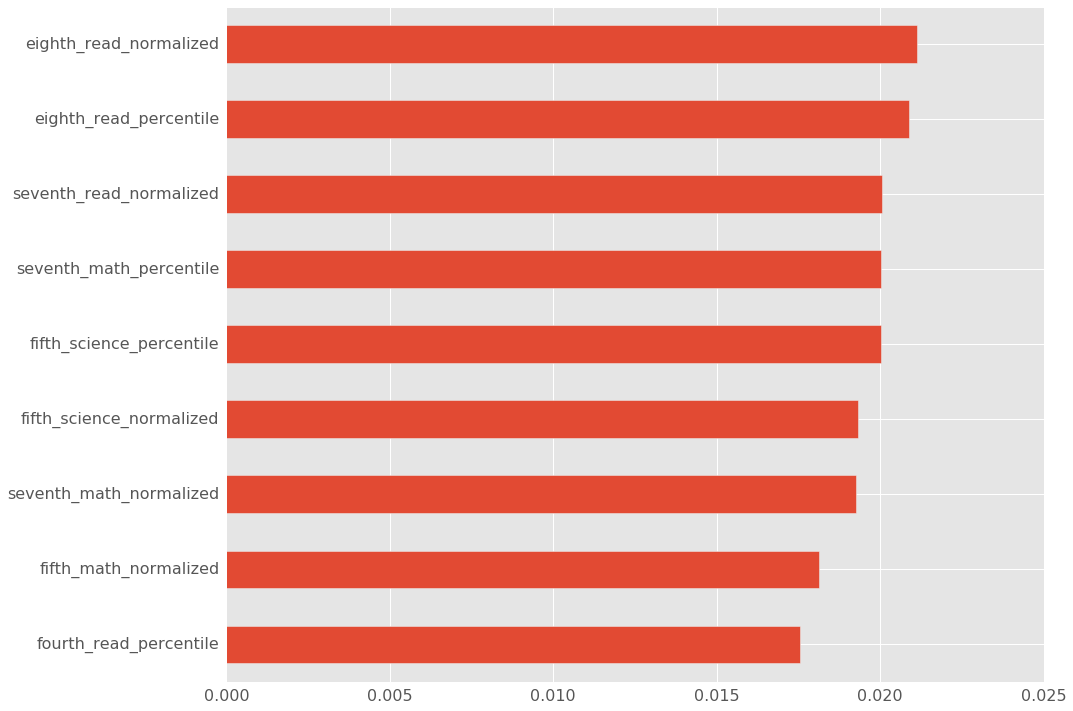

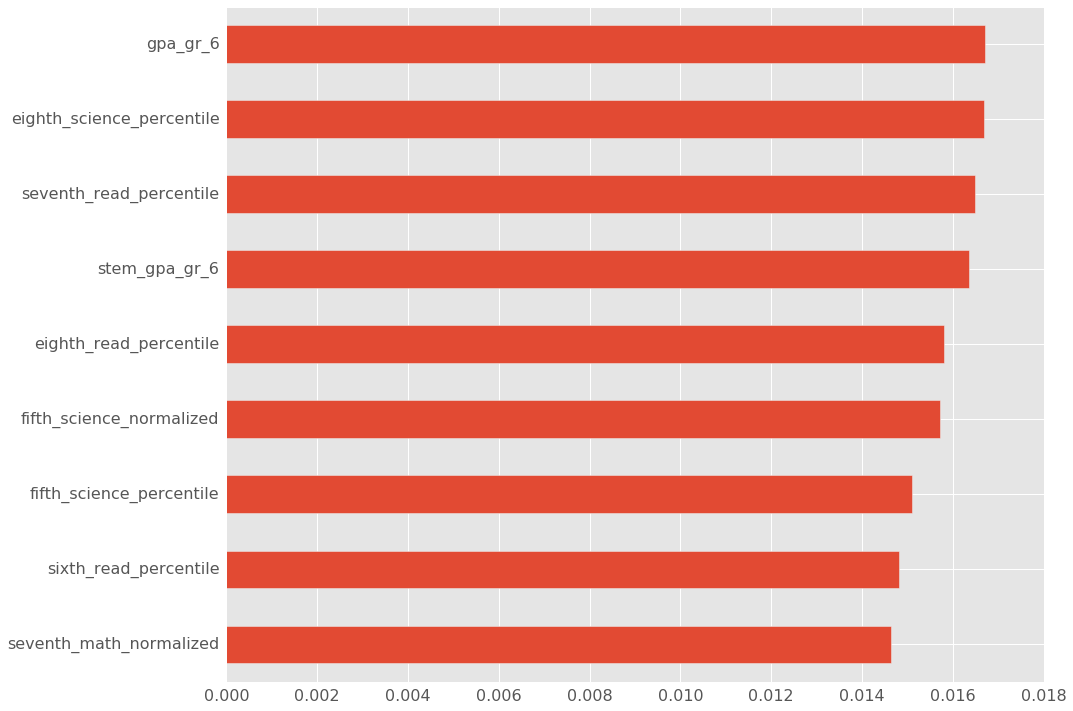

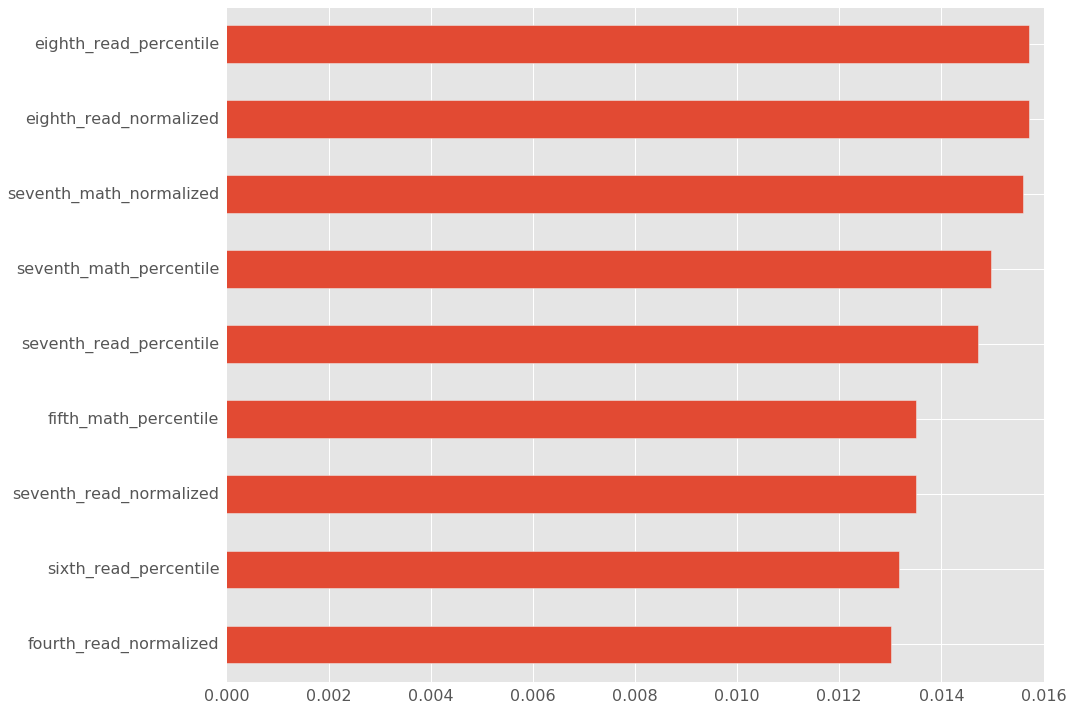

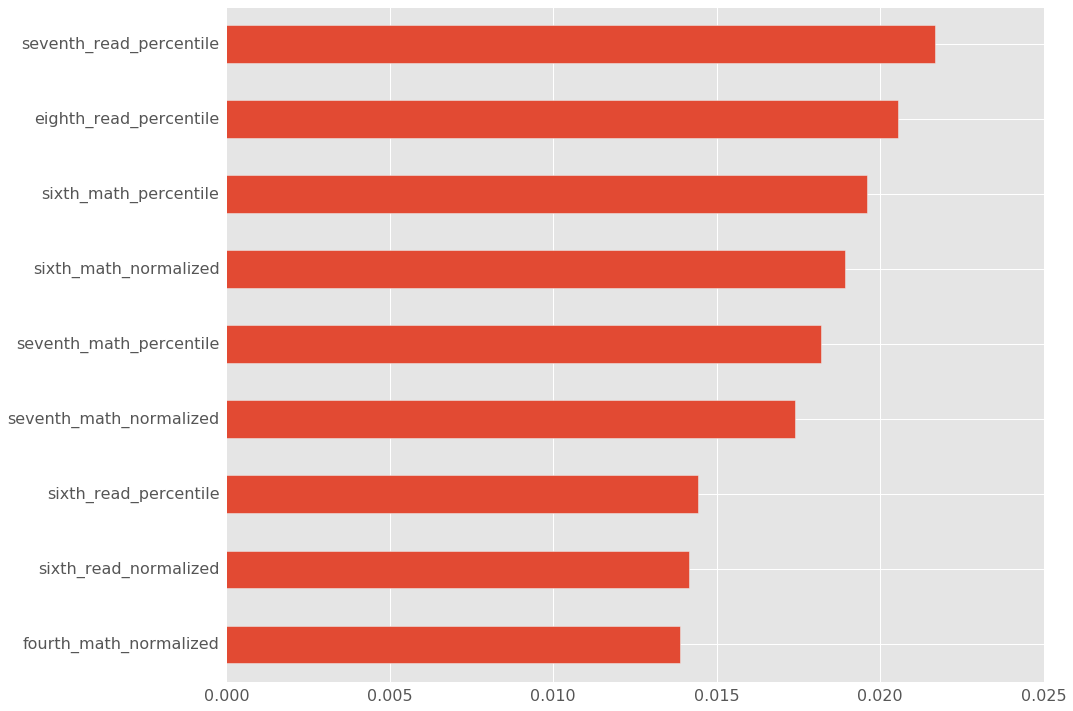

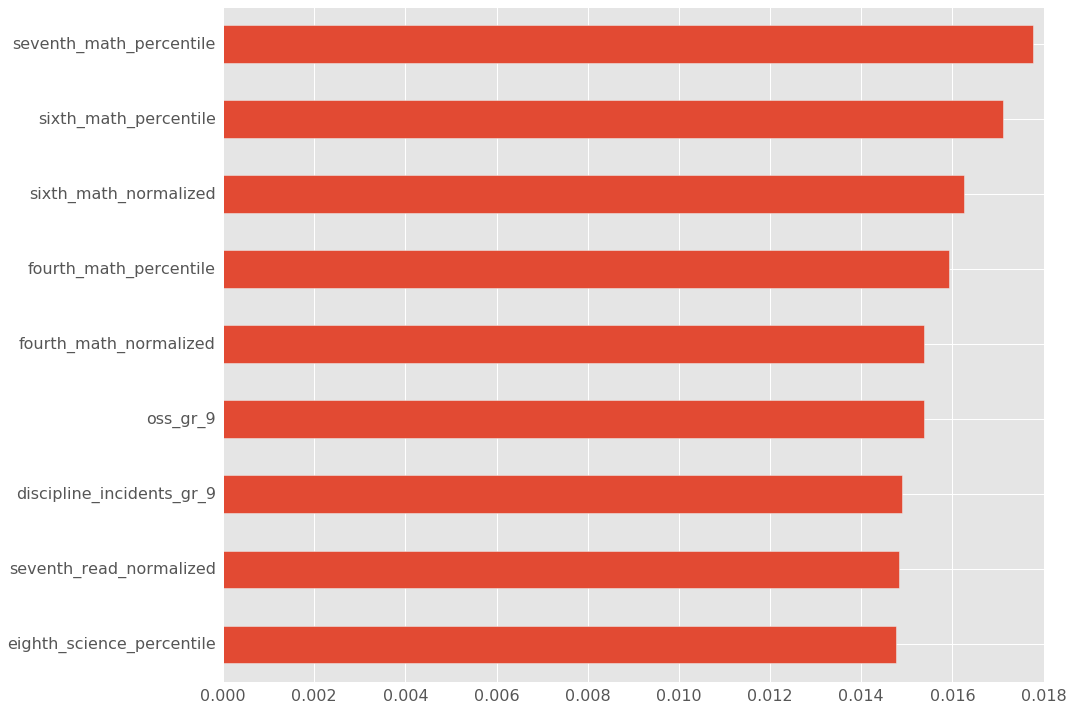

time: 14.6 s


In [124]:
for tab in tables:
    plot_feature_importance(tab)

In [110]:
tables = ['08_09_2016_grade_6_param_set_0_RF_ht_8585',
'08_09_2016_grade_7_param_set_7_RF_ht_10497',
'08_09_2016_grade_8_param_set_13_RF_ht_13254',
'08_09_2016_grade_9_param_set_0_RF_ht_8645',
'08_09_2016_grade_10_param_set_0_RF_ht_8680']
top10_feautres = {}
topN = 10
with postgres_pgconnection_generator() as conn:
    for table in tables:
        df = read_table_to_df(conn, table, schema='feature_scores', nrows=-1)
        df = df.sort_values(by=['importance'], ascending=False)
        top10_feautres[table] = list(df.feature[:topN])

time: 86.5 ms


In [117]:
pathname = os.path.dirname(sys.argv[0])
full_pathname = os.path.abspath(pathname)
split_pathname = full_pathname.split(sep="mvesc")
base_pathname = os.path.join(split_pathname[0], "mvesc")

time: 2.04 ms


In [123]:
pwd

'/home/xcheng/mvesc/Reports'

time: 2.94 ms
